<a href="https://colab.research.google.com/github/PaolaSanchezCastillo/Ejercicios/blob/master/Practica7RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Práctica: Clasificación con Regresión Logística**

Nombre: Sánchez Castillo Paola Elizabeth

Email:paolaescastillo@gmail.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Para generar las gráficas dentro del notebook
%matplotlib inline 

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

Fuente: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BreastCancer = pd.read_csv('/content/drive/MyDrive/Mineria/WDBCOriginal.csv')
#BreastCancer = pd.read_table('/content/drive/My Drive/FI-UNAM/Cursos/2021-1/MineríaDatos/2 Prácticas/7 RLogistica/WDBCClasificacion.txt')
BreastCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
print(BreastCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


#### **2) Selección de características**

Se utiliza una matriz de correlaciones con el propósito de seleccionar variables significativas

In [ ]:
Matriz = BreastCancer.corr(method='pearson')
Matriz

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [ ]:
plt.figure(figsize = (20,10))
sb.heatmap(Matriz, annot = True)    #Heatmap es una representación gráfica de datos en colores

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Compactness [Posición 7]

4) Concavity [Posición 8]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

**Referencia:** Lámina 44 de la presentación '8 IA_SelecciónCaracterísticas.pdf'


#### **3) Definición de variables predictoras y variable clase**

In [ ]:
BCancer = BreastCancer.replace({'M': 0, 'B': 1}) #remplaza los datos para poder trabajar con ellos.
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
0    212
1    357
dtype: int64


In [ ]:
#Variables predictoras
X = np.array(BCancer[['Texture', 'Area', 'Compactness','Concavity', 'Symmetry', 'FractalDimension']])
pd.DataFrame(X)

,0,1,2,3,4,5
0,10.38,1001.0,0.27760,0.30010,0.2419,0.07871
1,17.77,1326.0,0.07864,0.08690,0.1812,0.05667
2,21.25,1203.0,0.15990,0.19740,0.2069,0.05999
3,20.38,386.1,0.28390,0.24140,0.2597,0.09744
4,14.34,1297.0,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11590,0.24390,0.1726,0.05623
565,28.25,1261.0,0.10340,0.14400,0.1752,0.05533
566,28.08,858.1,0.10230,0.09251,0.1590,0.05648
567,29.33,1265.0,0.27700,0.35140,0.2397,0.07016


In [ ]:
#Variable clase
Y = np.array(BCancer[['Diagnosis']])
pd.DataFrame(Y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


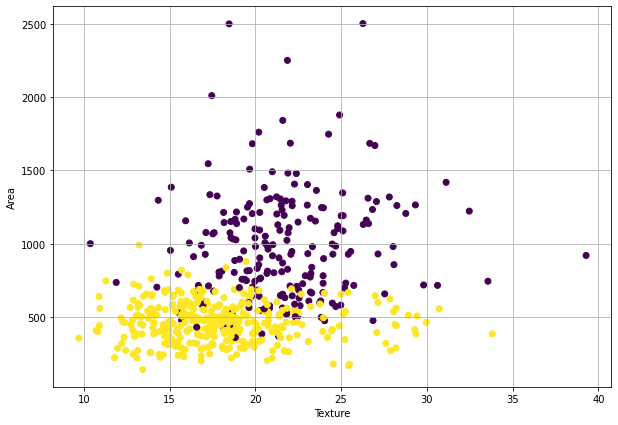

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c = BCancer.Diagnosis)
plt.grid()
plt.xlabel('Texture')
plt.ylabel('Area')
plt.show()

### **II. Aplicación del algoritmo**

Regresión logística


In [ ]:
#Se importan las bibliotecas necesarias para generar el modelo de regresión logística
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Se declara el modelo de tipo regresión logística
Clasificacion = linear_model.LogisticRegression()

In [ ]:
validation_size = 0.2
seed = 1234
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed, shuffle = True)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,18.22,493.1,0.16610,0.04825,0.1709,0.07253
1,22.44,378.4,0.08194,0.04824,0.2030,0.06552
2,20.76,480.4,0.12090,0.10650,0.1735,0.07070
3,23.84,499.0,0.12620,0.11280,0.1905,0.06590
4,18.32,340.9,0.04462,0.01993,0.2372,0.05768
...,...,...,...,...,...,...
450,15.18,587.4,0.07688,0.04479,0.2110,0.05853
451,15.10,1386.0,0.15150,0.19320,0.1973,0.06183
452,18.60,481.9,0.10580,0.08005,0.1925,0.06373
453,18.70,1033.0,0.14850,0.17720,0.2092,0.06310


In [ ]:
pd.DataFrame(Y_train)

,0
0,1
1,1
2,1
3,0
4,1
...,...
450,1
451,0
452,1
453,0


In [ ]:
#Se entrena el modelo a partir de los datos de entrada
Clasificacion.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicciones probabilísticas
Probabilidad = Clasificacion.predict_proba(X_train)
pd.DataFrame(Probabilidad)

,0,1
0,0.089340,0.910660
1,0.052251,0.947749
2,0.130881,0.869119
3,0.256818,0.743182
4,0.014399,0.985601
...,...,...
450,0.110791,0.889209
451,0.999081,0.000919
452,0.083925,0.916075
453,0.979914,0.020086


In [ ]:
#Predicciones con clasificación final
Predicciones = Clasificacion.predict(X_train)
pd.DataFrame(Predicciones)

,0
0,1
1,1
2,1
3,1
4,1
...,...
450,1
451,0
452,1
453,0


In [ ]:
#Para la evaluación la exactitud (accuracy) se puede usar la función score()
Clasificacion.score(X_train, Y_train)

0.8967032967032967

### **III. Validación del modelo**

1) Matriz de clasificación

In [ ]:
#Matriz de clasificación
PrediccionesNuevas = Clasificacion.predict(X_validation)
confusion_matrix = pd.crosstab(Y_validation.ravel(), PrediccionesNuevas, rownames=['Real'], colnames=['Predicción'])
confusion_matrix

Predicción,0,1
Real,,
0,39,6
1,2,67


In [ ]:
#Reporte de la clasificación
print("Exactitud", Clasificacion.score(X_validation, Y_validation))
print(classification_report(Y_validation, PrediccionesNuevas))

Exactitud 0.9298245614035088
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.92      0.97      0.94        69

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
#Información del modelo
print("Intercept:", Clasificacion.intercept_)
print('Coeficientes: \n', Clasificacion.coef_)

Intercept: [11.72346938]
Coeficientes: 
 [[-0.1908854  -0.0106113  -2.27353782 -3.0783869  -0.87661688 -0.2123106 ]]


### **IV. Modelo de clasificación**

**a+bX** = 11.72 - 0.19Texture – 0.01Area – 2.27Compactness – 3.08Concavity – 0.88Symmetry - 0.21FractalDimension

In [ ]:
#Paciente P-92751 (569)
NuevoPaciente1 = pd.DataFrame({'Texture': [24.54], 'Area': [181.0], 'Compactness': [0.04362], 'Concavity': [0.00000], 'Symmetry': [0.1587], 'FractalDimension': [1.000000]})
Clasificacion.predict(NuevoPaciente1)

array([1])

In [ ]:
#Paciente P-842302 (1)
NuevoPaciente2 = pd.DataFrame({'Texture': [10.38], 'Area': [1001.0], 'Compactness': [0.27760], 'Concavity': [0.676764], 'Symmetry': [0.2419], 'FractalDimension': [0.07871]})
Clasificacion.predict(NuevoPaciente2)

array([0])